## Exploring the datasets


In [2]:
# !pip install transformers

In [24]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers,seaborn,nltk,sklearn,tensorflow

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.19.0

numpy       : 1.18.5
pandas      : 1.1.3
torch       : 1.7.0
transformers: 3.4.0
seaborn     : 0.11.0
nltk        : 3.5
sklearn     : 0.0
tensorflow  : 2.3.1



In [3]:
import transformers
from transformers import BertTokenizer

import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style= 'whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 10, 6


### REAL and FAKE news dataset

Source: https://www.kaggle.com/nopdev/real-and-fake-news-dataset

In [3]:
import os
if not os.path.exists('news.csv'):
    !unzip news.csv.zip

Archive:  news.csv.zip
  inflating: news.csv                


In [4]:
df = pd.read_csv ('news.csv')

In [5]:
df.sample(5)

,Unnamed: 0,title,text,label
1924,1153,How Donald Trump blindsided the GOP: Inside th...,Why has Donald Trump’s appeal come to be so di...,REAL
1772,6573,"FBI Wants you to Believe It Examined 650,000 E...",". FBI Wants you to Believe It Examined 650,000...",FAKE
6123,3646,Will interest rates go up? Five things to expect,The Federal Reserve is likely to raise the fed...,REAL
492,7529,Daesh abducts 1000s near Mosul to use them as ...,Iraq Civilians leave their homes as Iraqi troo...,FAKE
4782,3711,Baltimore calls in federal agents to help homi...,Baltimore's police and civic leaders launched ...,REAL


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


**No missing values!!**

In [7]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [8]:
CLASS_NAMES = np.unique(df.label)
CLASS_NAMES

array(['FAKE', 'REAL'], dtype=object)

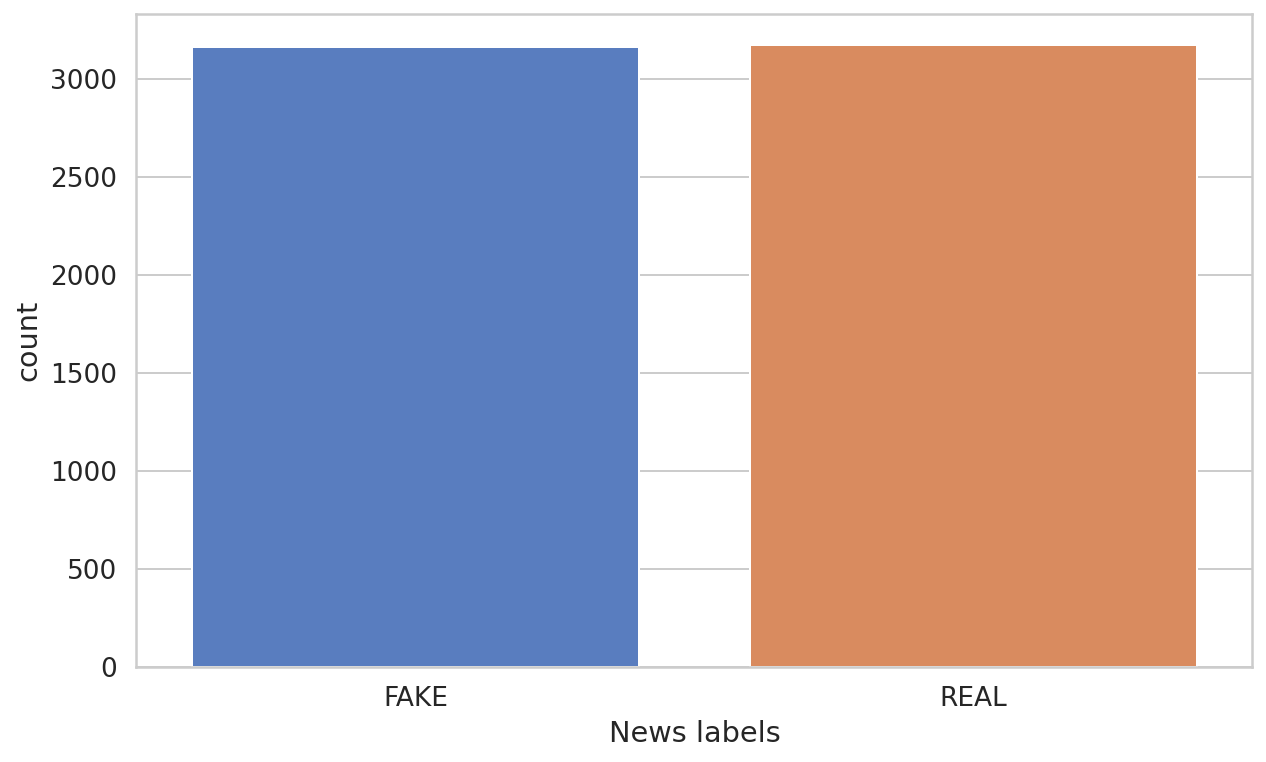

In [20]:
ax = sns.countplot(x = df.label);
plt.xlabel('News labels')
ax.set_xticklabels(labels = CLASS_NAMES);

We have a balanced classes, which means we may almost use any metric to evaluate the model. 

## BERT Tokenizer

In [10]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [11]:
token_lens = []

for txt in df.text:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


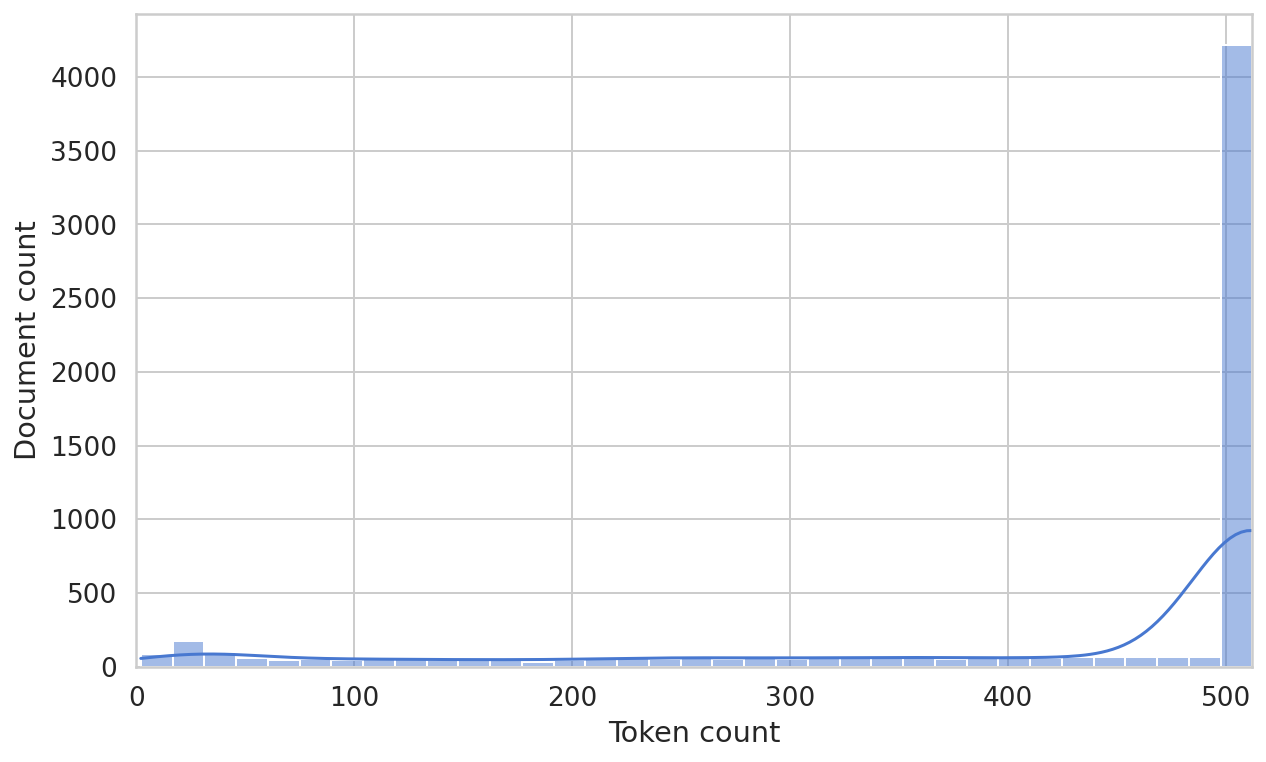

In [12]:
sns.histplot(token_lens, kde = True)
plt.xlim([0, 512]);
plt.xlabel('Token count');
plt.ylabel('Document count');

It seems that most of the documents have more than 512 tokens. Let's take a look at the distribution of the length of the whole documents. We will add a column to the data frame for the length of each document based on the words counts.

## Whitespace Tokenizer

In [13]:
df['News_length'] = df['text'].str.split().str.len()

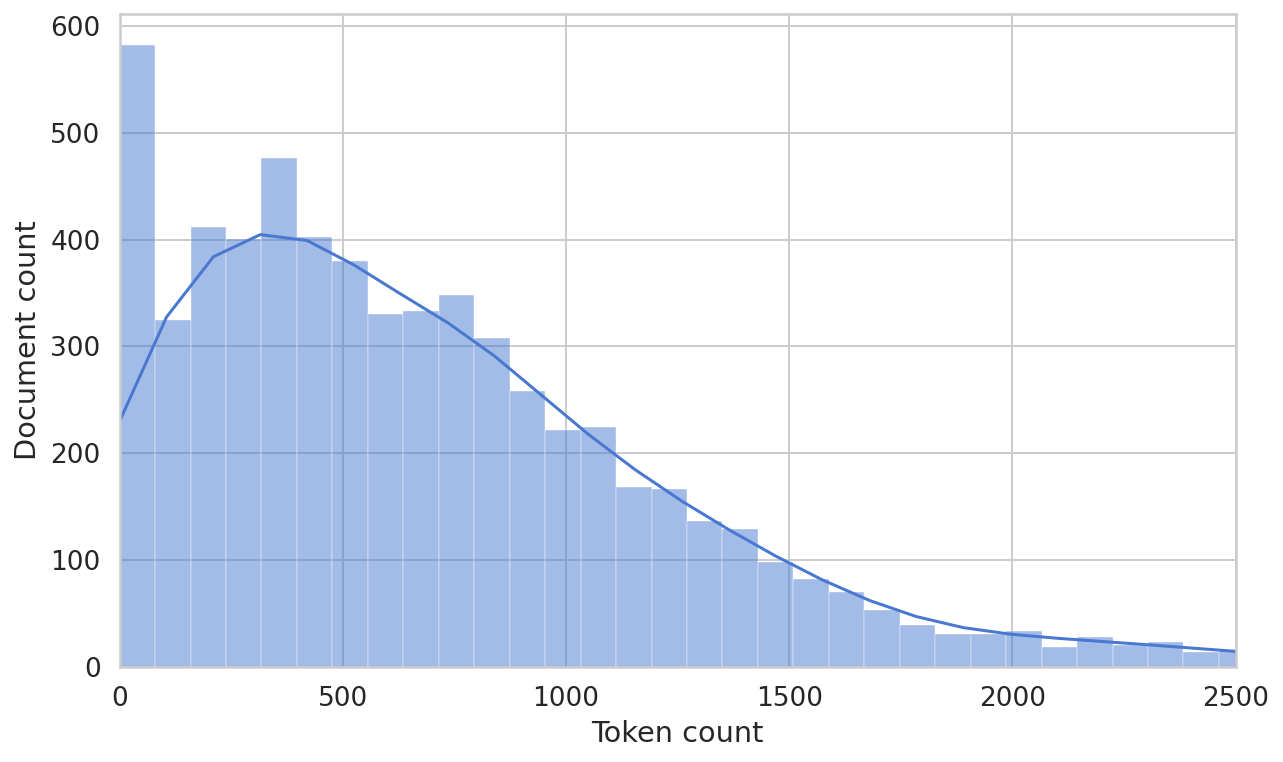

In [14]:
sns.histplot(df.News_length, kde = True)
plt.xlim([0, 2500]);
plt.xlabel('Token count');
plt.ylabel('Document count');

## News Length by Category

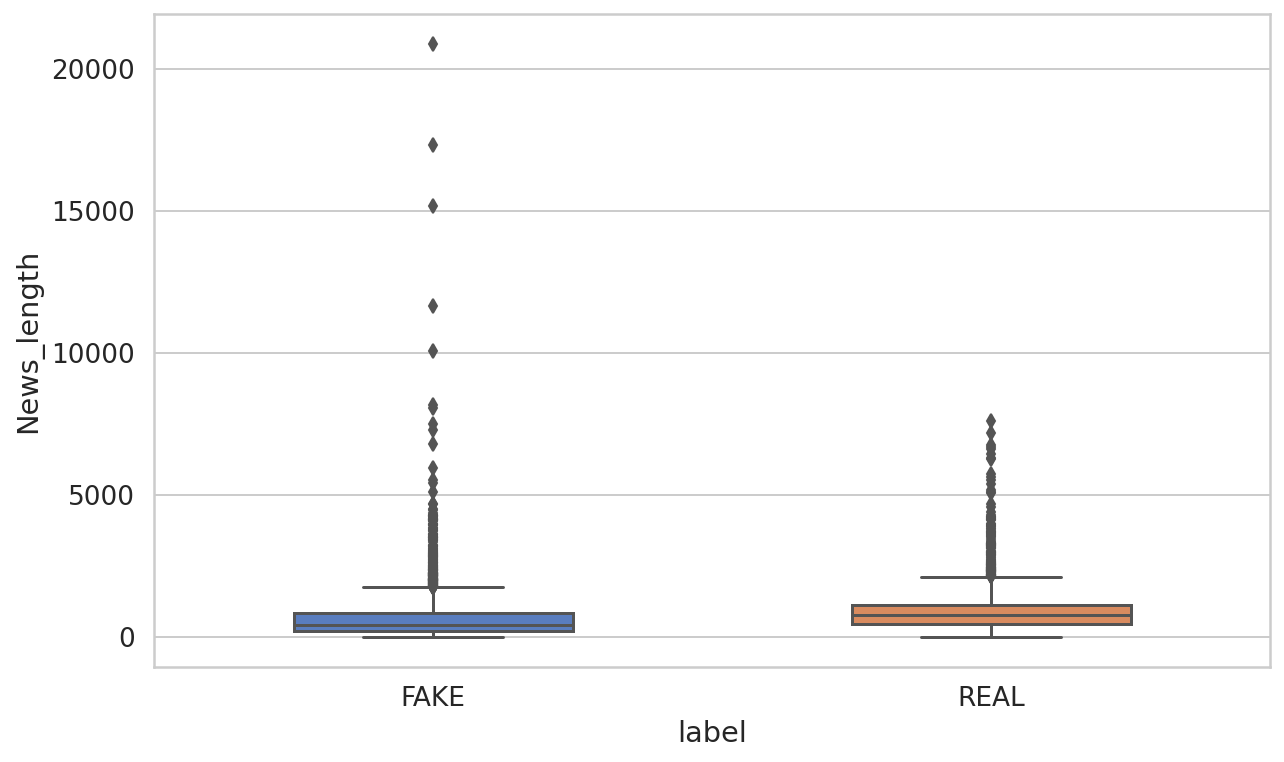

In [15]:
sns.boxplot(data=df, x='label', y='News_length', width=.5);
# sns.boxplot(data=df, x='News_length', y='label', width=.5, orient = "h");

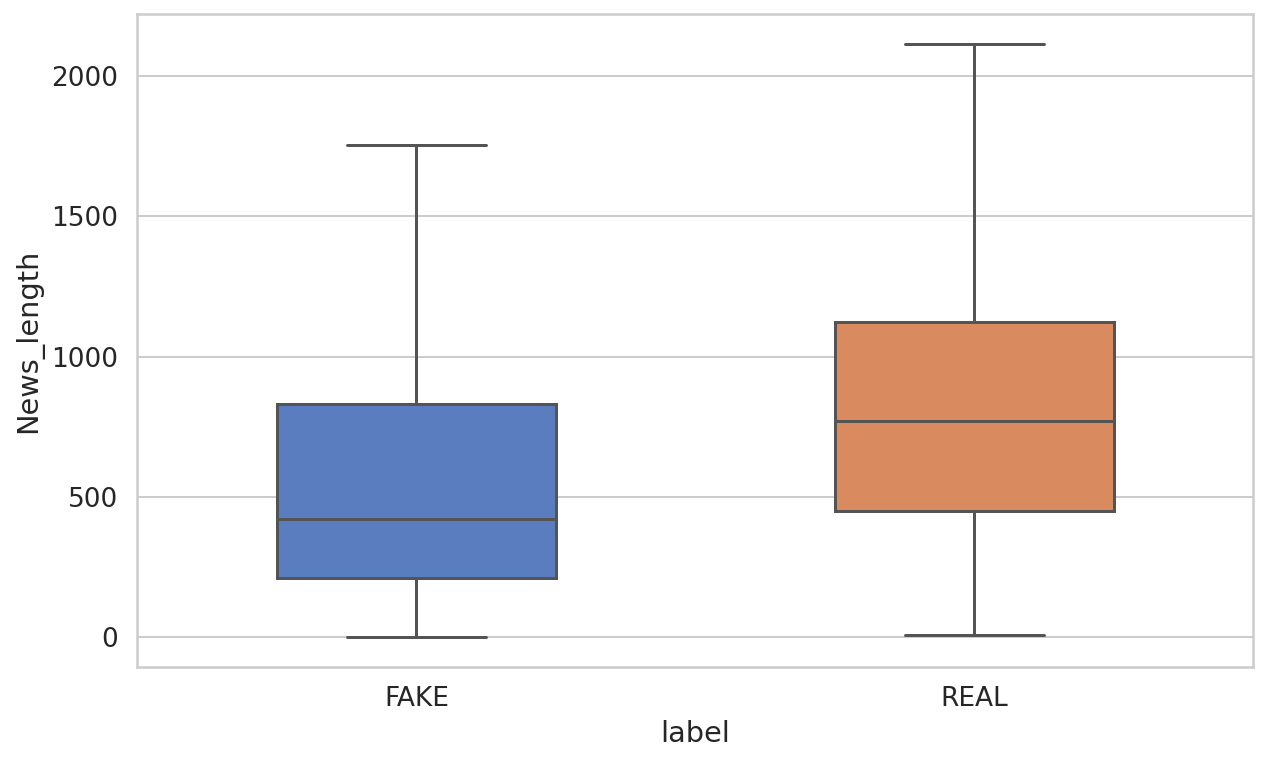

In [16]:
sns.boxplot(data=df, x='label', y='News_length', width=.5, showfliers = False);